In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/Users/juhimishra/Downloads/DSData-master 2/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In this data our target column is quality and this problem is clssification problem.

## EDA

In [4]:
df.shape

(1599, 12)

Total rows in this dataset are 1599 and column 12

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From the above summary we can conclude that :
1. There are no missing values
2. Difference between mean and std is high so in that part deviation looks good
3. by looking at quantile that is min, 25%, 50%, 75% and max we can conclude that there are some data which are skewed 
   need to work on that.

In [6]:
# Checking whether any data is missing or not via isna method:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

with this we come across that there is no missing data 

In [8]:
# Checking whether data is skewed or not
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

same we will check through visualization method:

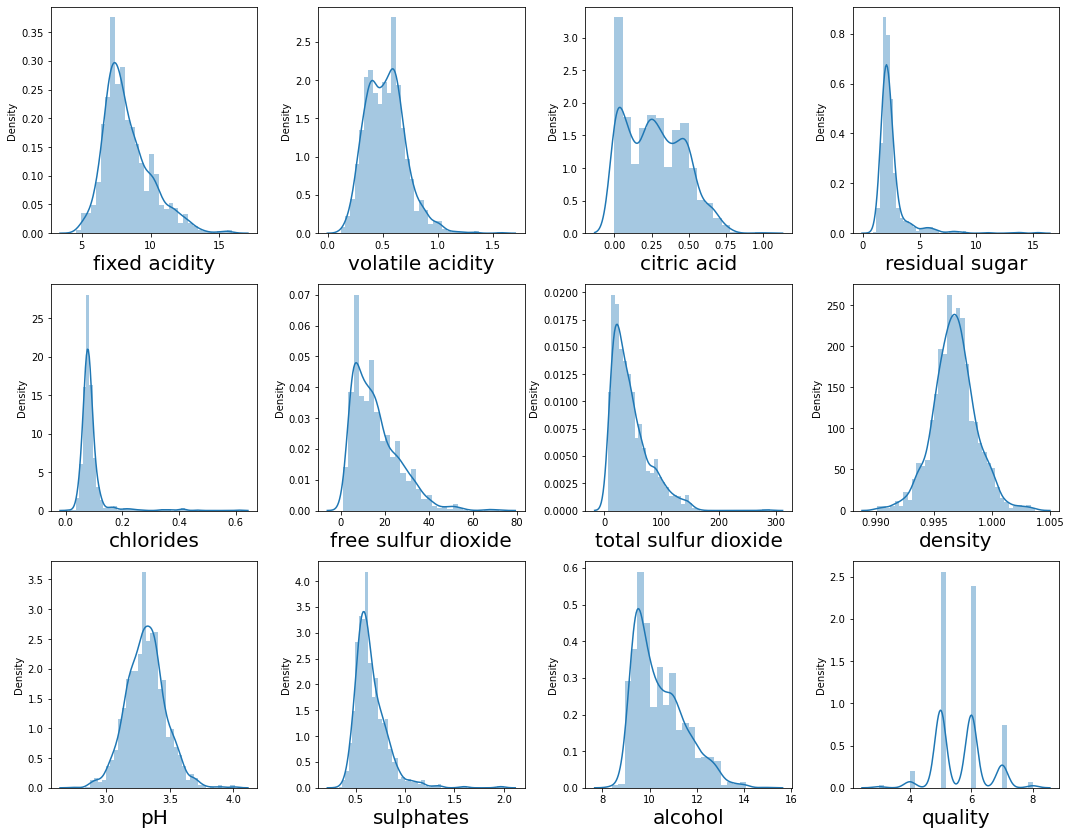

In [7]:
plt.figure(figsize = (15,15),facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

Same we can conclude through graph plot also that below mentioned features are skewed data which lies between -5/+5:
    
1. Fixed acidity
2. volatile acidity
3. residual sugar
4. chlorides
5. free sulfur dioxide
6. total sulfur dioxode
7. ph
8. sulphates
9. alcohol


In [8]:
# Removing Skewness Using Power Transformer
from sklearn.preprocessing import PowerTransformer

In [9]:
scaler = PowerTransformer(method = 'yeo-johnson')
'''
Parameters:
method = 'box-cox' or 'yeo jhonson'

'''

"\nParameters:\nmethod = 'box-cox' or 'yeo jhonson'\n\n"

In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [15]:
features = ['fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide',
           'total sulfur dioxide','pH','sulphates','alcohol']

In [16]:
df[features] = scaler.fit_transform(df[features].values)

In [18]:
df[features].head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,-0.442666,0.995542,-0.597145,-0.172896,-0.268045,-0.124411,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,0.556565,0.786204,0.993852,0.854954,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,0.152372,0.560696,0.193450,0.540394,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,-0.597145,-0.226113,0.385115,0.693699,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-0.597145,-0.172896,-0.268045,-0.124411,1.275690,-0.581650,-1.075025


In [19]:
df.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.318337
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                 0.071288
pH                     -0.002822
sulphates               0.009985
alcohol                 0.112372
quality                 0.217802
dtype: float64

Hence removed skewness using power transformer method

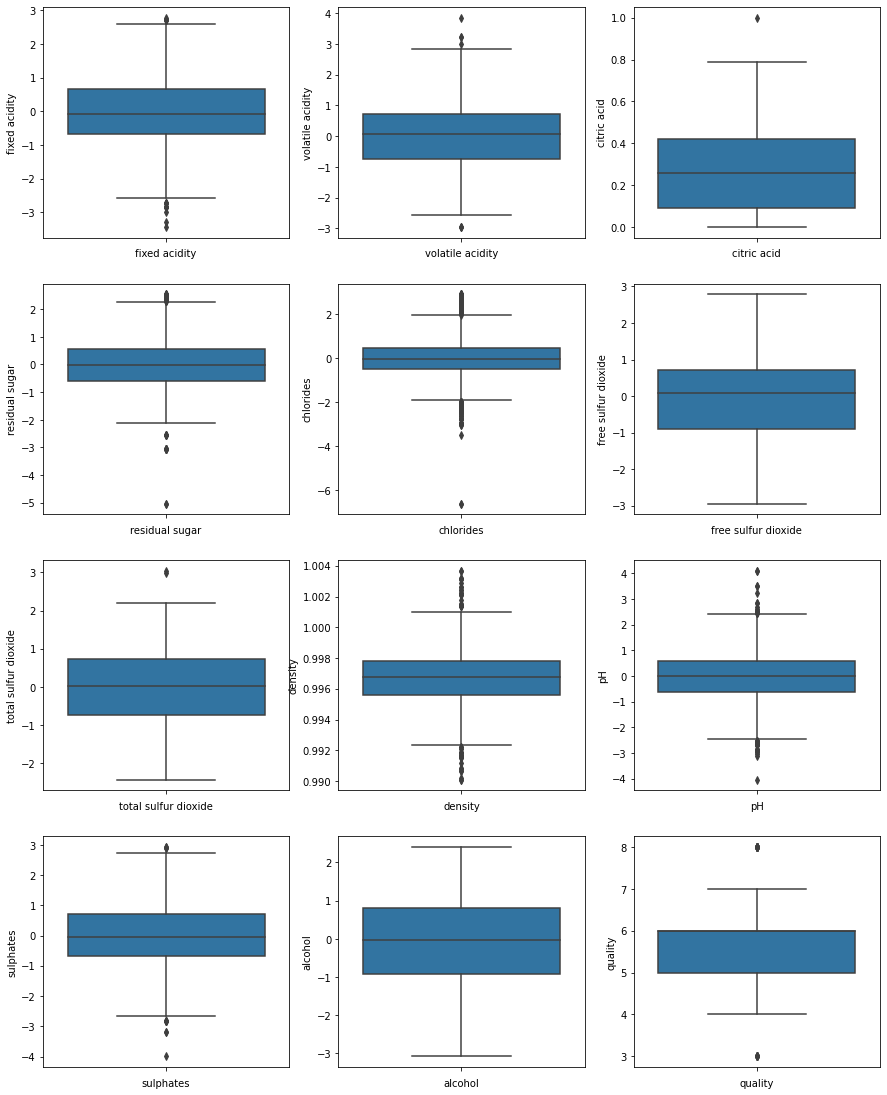

In [20]:
# Let's check outliers 
plt.figure(figsize=(15,50))

graph=1

for column in df.columns:
    if graph<=30:
        ax = plt.subplot(10,3,graph)
        sns.boxplot(y=df[column],orient='v') #orientation = v means vertical and if h that means horizontal
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

from above boxplot we can clearly see that more that 90% of our data are outliers so removing the same usning zscore method

In [21]:
from scipy.stats import zscore

In [23]:
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([   7,   45,   45,   95,   95,  126,  127,  151,  151,  170,  198,
         442,  459,  469,  480,  517,  517,  544,  544,  554,  555,  557,
         608,  614,  690,  695,  695,  797,  832,  836,  836,  837,  837,
         889,  899,  909,  914, 1017, 1017, 1018, 1018, 1081, 1114, 1269,
        1270, 1287, 1299, 1299, 1316, 1316, 1321, 1321, 1369, 1374, 1374,
        1434, 1435, 1469, 1474, 1476, 1478, 1505, 1571]),
 array([ 3,  0,  8,  0,  8,  1,  1,  2,  8,  9,  3,  7, 11,  3,  7, 10, 11,
         8, 10,  7,  7,  7,  7,  8, 11,  4,  8,  4, 11,  4,  7,  4,  7,  7,
        11,  3,  3,  3,  7,  3,  7,  6,  7,  7,  7,  9,  1, 11,  3,  8,  3,
         8,  9,  3, 11,  7,  7, 11,  7,  7, 11, 11,  4]))

In [24]:
df_new_z = df[(z<3).all(axis=1)]
df_new_z.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.442666,0.995542,0.00,-0.597145,-0.172896,-0.268045,-0.124411,0.9978,1.275690,-0.581650,-1.075025,5
1,-0.161308,1.771299,0.00,0.556565,0.786204,0.993852,0.854954,0.9968,-0.709517,0.395140,-0.500860,5
2,-0.161308,1.269801,0.04,0.152372,0.560696,0.193450,0.540394,0.9970,-0.310054,0.183772,-0.500860,5
3,1.522582,-1.550050,0.56,-0.597145,-0.226113,0.385115,0.693699,0.9980,-0.980154,-0.392318,-0.500860,6
4,-0.442666,0.995542,0.00,-0.597145,-0.172896,-0.268045,-0.124411,0.9978,1.275690,-0.581650,-1.075025,5


In [26]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

from the above data we can conclude that our data is imbalanced data so to balance that will do oversampling 

In [14]:
## Splitting target and feature variable into x and y
x = df.drop(columns=['quality'])
y= df['quality']

feature has been stored in x variable and target has been stored in y variable

In [15]:
x.shape

(1599, 11)

In [16]:
y.shape

(1599,)

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()


In [18]:
x1,y1 = sm.fit_resample(x,y)

In [19]:
y1.value_counts()

7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64

In [20]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x1)
x_scaler

array([[-0.58740669,  0.48772281, -1.35850563, ...,  1.20406294,
        -0.62078068, -1.1150557 ],
       [-0.34492724,  1.22702833, -1.35850563, ..., -0.81239602,
         0.12152287, -0.77319249],
       [-0.34492724,  0.73415798, -1.16121981, ..., -0.42211364,
        -0.06405302, -0.77319249],
       ...,
       [-0.16130347, -0.92121951,  0.24442436, ..., -0.8174745 ,
         0.30771329,  1.72878989],
       [ 0.91017253, -1.2966632 ,  1.28051033, ..., -2.0949505 ,
        -0.09999558,  0.98885061],
       [ 1.92993097, -1.05834325,  1.80043418, ..., -2.45234271,
         0.9155582 , -0.52454908]])

scaled the data 

# Finding best random_state

In [24]:
maxaccu = 0
maxrs = 0

for i in range(1,500):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x_scaler,y1,test_size = 0.30,random_state = i)
    dt = DecisionTreeClassifier()
    dt.fit(x1_train,y1_train)
    pred = dt.predict(x1_test)
    acc = accuracy_score(y1_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print("Best Accuracy score is:",maxaccu,"On Random state: ",maxrs)
        
    

Best Accuracy score is: 0.8197389885807504 On Random state:  463


In [25]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_scaler,y1,random_state=maxrs,test_size=0.30)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [29]:
DTC = DecisionTreeClassifier()
DTC.fit(x1_train,y1_train)
pred = DTC.predict(x1_test)
acc = classification_report(y1_test,pred)
print(acc)

              precision    recall  f1-score   support

           3       0.95      0.96      0.95       204
           4       0.82      0.92      0.87       214
           5       0.74      0.67      0.70       211
           6       0.61      0.63      0.62       194
           7       0.79      0.72      0.76       203
           8       0.95      0.95      0.95       200

    accuracy                           0.81      1226
   macro avg       0.81      0.81      0.81      1226
weighted avg       0.81      0.81      0.81      1226



accuracy score for Decisiontreeclassifier we got as 81% let's check cv score

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
print(cross_val_score(DTC,x1,y1,cv=5).mean())

0.7254039317318712


cv score we got here is 72% so the difference between cv score and accuracy score for DTC is almost 9%

In [32]:
RFC = RandomForestClassifier()
RFC.fit(x1_train,y1_train)
pred =RFC.predict(x1_test)
acc = classification_report(y1_test,pred)
print(acc)


              precision    recall  f1-score   support

           3       0.96      1.00      0.98       204
           4       0.88      0.96      0.92       214
           5       0.81      0.70      0.75       211
           6       0.70      0.63      0.67       194
           7       0.86      0.94      0.90       203
           8       0.99      0.99      0.99       200

    accuracy                           0.87      1226
   macro avg       0.87      0.87      0.87      1226
weighted avg       0.87      0.87      0.87      1226



accuracy acore for RandomForestClassifier we got as 87%

In [33]:
print(cross_val_score(RFC,x1,y1,cv=5).mean())

0.8059227359921952


CV score is 80% so the difference between two is 7% which is lesser than Decision Tree Classifier

In [34]:
SV = SVC()
SV.fit(x1_train,y1_train)
pred = SV.predict(x1_test)
acc = classification_report(y1_test,pred)
print(acc)

              precision    recall  f1-score   support

           3       0.93      1.00      0.96       204
           4       0.78      0.89      0.83       214
           5       0.69      0.54      0.61       211
           6       0.59      0.49      0.54       194
           7       0.78      0.76      0.77       203
           8       0.85      0.98      0.91       200

    accuracy                           0.78      1226
   macro avg       0.77      0.78      0.77      1226
weighted avg       0.77      0.78      0.77      1226



Here accuracy score we got as 78%

In [40]:
print(cross_val_score(SV,x1,y1,cv=10).mean())

0.3854643079725778


Cv score for SVC is 38% so the difference between accuracy and CV is almost 40%. From this we can conclude that we gor RandomForestClassifier as best model and will do hyperparameter tuning for the same

## Hyperparameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
# RandomForestClassifier
param = {'n_estimators':[100,700],
        'criterion':['gini','entropy'],
        'max_depth':[2,3,4,5,6],
        'max_features':['auto','sqrt','log2']}

In [50]:
GC = GridSearchCV(RFC,param,cv=5)

In [51]:
GC.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 700]})

In [52]:
GC.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 700}

In [53]:
final_rfc = RandomForestClassifier(criterion = 'entropy',max_depth = 6, max_features = 'log2',n_estimators = 700)
final_rfc.fit(x1_train,y1_train)
pred = final_rfc.predict(x1_test)
acc = accuracy_score(pred,y1_test)
print(acc*100)

77.97716150081567


## Saving the model¶

In [54]:
import joblib
joblib.dump(final_rfc,'Finalmodelwine.pk1')

['Finalmodelwine.pk1']